In [1]:
# Mengimport library yang akan digunakan
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns',None)
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Mengupload data
data = pd.read_csv(r"C:\Users\USER\Documents\Mini Project (Portofolio)\VIX Idx Partner\loan_data_2007_2014.csv",index_col=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13  annu

In [3]:
data.sample(2)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
291417,29523869,32057030,12000,12000,12000.0,36 months,13.35,406.36,C,C2,mail carrier,8 years,MORTGAGE,68000.0,Not Verified,Oct-14,Late (31-120 days),n,https://www.lendingclub.com/browse/loanDetail....,NaN,credit_card,Credit card refinancing,062xx,CT,9.44,1.0,Apr-91,0.0,5.0,NaN,6.0,0.0,12662,75.8,15.0,w,7983.27,7983.27,5689.04,5689.04,4016.73,1672.31,0.0,0.0,0.0,Jan-16,406.36,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,309295.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16700.0,NaN,NaN,NaN
30348,510815,659652,16000,16000,15900.0,36 months,13.85,545.67,C,C4,FirstEnergy,10+ years,MORTGAGE,54000.0,Not Verified,May-10,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 05/01/10 > Plan on paying ...,debt_consolidation,Lending Club Loan 1,440xx,OH,10.22,0.0,Jun-98,2.0,NaN,106.0,16.0,1.0,18936,55.7,22.0,f,0.00,0.00,16428.78,16326.10,16000.00,428.78,0.0,0.0,0.0,Sep-10,297.01,NaN,Sep-10,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
data = data.rename(columns={'member_id': 'Member', 'loan_amnt' : 'Loan Amount', 'funded_amnt':'Funded Amount','funded_amnt_inv':'Amount Investors', 'term':'Tenor', 'int_rate' :'Rate',
                            'installment':'Installment','emp_title':'Employ Title','emp_length':'Employ Length','grade':'Grade','sub_grade':'Sub Grade','home_ownership':'Home Ownership',
                            'annual_inc':'Annual Income','verification_status':'Verification Status','issue_d':'Issue Date','loan_status':'Loan Status','pymnt_plan':'Payment Plan','desc':'Description',
                            'purpose':'Purpose','title':'Title','zip_code':'Zip Code','addr_state':'Addres States','delinq_2yrs':'Delinq 2 Years','mths_since_last_delinq':'Months Last Delinq',
                            'mths_since_last_record':'Months Last Record','open_acc':'Open Accord Credits','pub_rec':'Public Record','total_acc':'Total Accord','initial_list_status':'Initial status',
                            'total_pymnt':'Total Payment','total_pymnt_inv':'Total Payment Investation','last_pymnt_d':'Last Payment Date','last_pymnt_amnt':'Last Payment Amount',
                            'next_pymnt_d':'Next Payment Date','last_credit_pull_d':'Credit Pull Date','policy_code':'Police Code','application_type':'Application Type','acc_now_delinq': 'Accord Now Delinq',
                            'tot_coll_amt':'Total Collection Amount', 'tot_cur_bal':'Total Current Balance','total_rec_prncp':'Total Received Principal','total_rec_int': 'Total Interest Received',
                            'total_rec_late_fee':'Total Received Late','earliest_cr_line':'Earlist Credit Line','inq_last_6mths':'Inquiries Last 6Months','revol_bal':'Revolving Balance',
                            'revol_util':'Revolving Ultilization Rate','recoveries':'Recoveries', 'collection_recovery_fee':'Collection Recovery Fee','collections_12_mths_ex_med':'Collections 12 Months',
                            'mths_since_last_major_derog':'Months Since Recent 90 Day','total_rev_hi_lim':'Total Revolving High Limit','out_prncp':'Outstanding Pricipal',
                            'out_prncp_inv':'Outstanding Pricipal Investors'})

data.sample(2)

,id,Member,Loan Amount,Funded Amount,Amount Investors,Tenor,Rate,Installment,Grade,Sub Grade,Employ Title,Employ Length,Home Ownership,Annual Income,Verification Status,Issue Date,Loan Status,Payment Plan,url,Description,Purpose,Title,Zip Code,Addres States,dti,Delinq 2 Years,Earlist Credit Line,Inquiries Last 6Months,Months Last Delinq,Months Last Record,Open Accord Credits,Public Record,Revolving Balance,Revolving Ultilization Rate,Total Accord,Initial status,Outstanding Pricipal,Outstanding Pricipal Investors,Total Payment,Total Payment Investation,Total Received Principal,Total Interest Received,Total Received Late,Recoveries,Collection Recovery Fee,Last Payment Date,Last Payment Amount,Next Payment Date,Credit Pull Date,Collections 12 Months,Months Since Recent 90 Day,Police Code,Application Type,annual_inc_joint,dti_joint,verification_status_joint,Accord Now Delinq,Total Collection Amount,Total Current Balance,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,Total Revolving High Limit,inq_fi,total_cu_tl,inq_last_12m
446059,11625875,13598030,15000,15000,15000.0,36 months,11.99,498.15,B,B3,Store Manager,10+ years,MORTGAGE,110000.0,Not Verified,Feb-14,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,296xx,SC,11.74,0.0,May-95,1.0,NaN,NaN,7.0,0.0,36213,71.7,24.0,f,0.0,0.0,7860.48,7860.48,4416.79,1561.01,0.0,1882.68,338.8824,Feb-15,498.15,NaN,Jul-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,225.0,179019.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,50500.0,NaN,NaN,NaN
321460,24726286,27169098,5000,5000,5000.0,36 months,16.99,178.24,D,D3,home health aid,10+ years,RENT,20000.0,Verified,Aug-14,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,debt_consolidation,Debt consolidation,104xx,NY,9.30,0.0,Jul-94,1.0,NaN,107.0,8.0,1.0,4733,27.7,13.0,f,0.0,0.0,5797.69,5797.69,5000.00,797.69,0.0,0.00,0.0000,Oct-15,880.57,NaN,Oct-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,0.0,4733.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN


In [5]:
print(data.shape)
print('Data Duplikat: ', data.duplicated().sum())
print(data.id.nunique())
print(data.Member.nunique())

(466285, 74)


Tidak ditemukan data duplicat dan setiap baris mewakili 1 nasabah.

In [ ]:
# Menghapus kolom yang tidak diperlukan 
data =data.dropna(axis=1, how='all')
col_drop=[
    'id',
    'Member',
    'url',
    'Description',
    'Zip Code',
    'Application Type',
    'Sub Grade',
    'Police Code',
    'Title'
]
data =data.drop(col_drop, axis=1) 

In [ ]:
data.sample(2)

,Loan Amount,Funded Amount,Amount Investors,Tenor,Rate,Installment,Grade,Employ Title,Employ Length,Home Ownership,Annual Income,Verification Status,Issue Date,Loan Status,Payment Plan,Purpose,Addres States,dti,Delinq 2 Years,Earlist Credit Line,Inquiries Last 6Months,Months Last Delinq,Months Last Record,Open Accord Credits,Public Record,Revolving Balance,Revolving Ultilization Rate,Total Accord,Initial status,Outstanding Pricipal,Outstanding Pricipal Investors,Total Payment,Total Payment Investation,Total Received Principal,Total Interest Received,Total Received Late,Recoveries,Collection Recovery Fee,Last Payment Date,Last Payment Amount,Next Payment Date,Credit Pull Date,Collections 12 Months,Months Since Recent 90 Day,Accord Now Delinq,Total Collection Amount,Total Current Balance,Total Revolving High Limit
105839,12000,12000,11950.0,60 months,15.22,286.87,C,Goodyear Dunlop Tires,10+ years,RENT,65000.0,Verified,Aug-13,Charged Off,n,credit_card,NY,18.83,0.0,Mar-00,0.0,NaN,NaN,10.0,0.0,31501,41.7,24.0,f,0.0,0.0,6880.56,6851.90,3748.33,3132.23,0.0,0.00,0.0,Aug-15,286.87,NaN,Jan-16,0.0,NaN,0.0,0.0,55205.0,75500.0
174752,29100,29100,29075.0,60 months,19.72,766.45,D,HYDRO,4 years,MORTGAGE,65000.0,Verified,Jan-13,Charged Off,n,major_purchase,AZ,9.99,0.0,Nov-95,0.0,43.0,NaN,12.0,0.0,3460,17.8,38.0,f,0.0,0.0,7917.93,7911.19,2439.14,3682.78,0.0,1796.01,0.0,Sep-13,766.45,NaN,Jan-16,0.0,43.0,0.0,1316.0,137793.0,18900.0


### Tenor

In [ ]:
data['Tenor'] = data['Tenor'].str.replace('months','')
data['Tenor'].unique()
data['Tenor'] =data['Tenor'].astype(int)

### Employ Length

In [9]:
# Perbaikan type data kolom Emp_length
data['Employ Length'] = data['Employ Length'].str.replace('\+ years','')
data['Employ Length'] = data['Employ Length'].str.replace('< 1 year',str(0))
data['Employ Length'] = data['Employ Length'].str.replace(' years','')
data['Employ Length'] = data['Employ Length'].str.replace(' year','')
data['Employ Length'] = data['Employ Length'].replace('10+',10)

print(data['Employ Length'].isnull().sum())
data['Employ Length'] = data['Employ Length'].fillna(0)

data['Employ Length']= data['Employ Length'].astype(int)
print(data['Employ Length'].info())

21008
<class 'pandas.core.series.Series'>
Index: 466285 entries, 0 to 466284
Series name: Employ Length
Non-Null Count   Dtype
--------------   -----
466285 non-null  int32
dtypes: int32(1)
memory usage: 5.3 MB
None


### Col Date 

In [10]:
col_date = ['Issue Date', 'Earlist Credit Line','Next Payment Date','Credit Pull Date','Last Payment Date']

for col in col_date:
    data[col] = pd.to_datetime(data[col], format='%b-%y', errors='coerce')

In [11]:
data[['Issue Date', 'Earlist Credit Line','Next Payment Date','Credit Pull Date','Last Payment Date']].describe()

,Issue Date,Earlist Credit Line,Next Payment Date,Credit Pull Date,Last Payment Date
count,466285,466256,239071,466243,465909
mean,2013-08-23 15:33:29.494623232,1997-12-16 11:57:43.058920192,2016-01-09 10:57:21.631983872,2015-08-30 16:56:26.436685824,2015-04-23 05:05:48.379619584
min,2007-06-01 00:00:00,1969-01-01 00:00:00,2007-12-01 00:00:00,2007-05-01 00:00:00,2007-12-01 00:00:00
25%,2013-03-01 00:00:00,1994-03-01 00:00:00,2016-02-01 00:00:00,2015-11-01 00:00:00,2015-01-01 00:00:00
50%,2014-01-01 00:00:00,1999-03-01 00:00:00,2016-02-01 00:00:00,2016-01-01 00:00:00,2015-12-01 00:00:00
75%,2014-07-01 00:00:00,2002-09-01 00:00:00,2016-02-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00
max,2014-12-01 00:00:00,2068-12-01 00:00:00,2016-03-01 00:00:00,2016-01-01 00:00:00,2016-01-01 00:00:00


In [12]:
def fix_year(date):
    if date.year > 2014:
        return date.replace(year=date.year - 100)
    else:
        return date
    
data['Earlist Credit Line'] = data['Earlist Credit Line'].apply(fix_year)

In [13]:
data['Earlist Credit Line'].sample(4)

448913   2005-01-01
76114    1985-01-01
106262   2001-12-01
456297   1985-08-01
Name: Earlist Credit Line, dtype: datetime64[ns]

In [14]:
data.head()

,Loan Amount,Funded Amount,Amount Investors,Tenor,Rate,Installment,Grade,Employ Title,Employ Length,Home Ownership,Annual Income,Verification Status,Issue Date,Loan Status,Payment Plan,Purpose,Addres States,dti,Delinq 2 Years,Earlist Credit Line,Inquiries Last 6Months,Months Last Delinq,Months Last Record,Open Accord Credits,Public Record,Revolving Balance,Revolving Ultilization Rate,Total Accord,Initial status,Outstanding Pricipal,Outstanding Pricipal Investors,Total Payment,Total Payment Investation,Total Received Principal,Total Interest Received,Total Received Late,Recoveries,Collection Recovery Fee,Last Payment Date,Last Payment Amount,Next Payment Date,Credit Pull Date,Collections 12 Months,Months Since Recent 90 Day,Accord Now Delinq,Total Collection Amount,Total Current Balance,Total Revolving High Limit
0,5000,5000,4975.0,36,10.65,162.87,B,NaN,10,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,AZ,27.65,0.0,1985-01-01,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,2015-01-01,171.62,NaT,2016-01-01,0.0,NaN,0.0,NaN,NaN,NaN
1,2500,2500,2500.0,60,15.27,59.83,C,Ryder,0,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,GA,1.00,0.0,1999-04-01,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,NaT,2013-09-01,0.0,NaN,0.0,NaN,NaN,NaN
2,2400,2400,2400.0,36,15.96,84.33,C,NaN,10,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,IL,8.72,0.0,2001-11-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,2014-06-01,649.91,NaT,2016-01-01,0.0,NaN,0.0,NaN,NaN,NaN
3,10000,10000,10000.0,36,13.49,339.31,C,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,CA,20.00,0.0,1996-02-01,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,2015-01-01,357.48,NaT,2015-01-01,0.0,NaN,0.0,NaN,NaN,NaN
4,3000,3000,3000.0,60,12.69,67.79,B,University Medical Group,1,RENT,80000.0,Source Verified,2011-12-01,Current,n,other,OR,17.94,0.0,1996-01-01,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,2016-01-01,67.79,2016-02-01,2016-01-01,0.0,NaN,0.0,NaN,NaN,NaN


Memodifikasi **Issue Date, Earlist Credit Line,Next Payment Date,Credit Pull Date,Last Payment Date** dari format bulan-tahun menjadi perhitungan berapa lama waktu berlalu sejak waktu tersebut. saya menggunakan tahun 2017 sebagai reference dikarenakan saya melihat tanggal maksimal pembayaran ada di tahun 2016.

In [15]:
data['Issue Date'] = round(pd.to_numeric((pd.to_datetime('2017-12-01')- data['Issue Date'])//np.timedelta64(1, 'D')))
data['Earlist Credit Line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01')- data['Earlist Credit Line'])//np.timedelta64(1, 'D')))
data['Next Payment Date'] = round(pd.to_numeric((pd.to_datetime('2017-12-01')- data['Next Payment Date'])//np.timedelta64(1, 'D')))
data['Credit Pull Date'] = round(pd.to_numeric((pd.to_datetime('2017-12-01')- data['Credit Pull Date'])//np.timedelta64(1, 'D')))
data['Last Payment Date'] = round(pd.to_numeric((pd.to_datetime('2017-12-01')- data['Last Payment Date'])//np.timedelta64(1, 'D')))


In [16]:
data.sample(2)

,Loan Amount,Funded Amount,Amount Investors,Tenor,Rate,Installment,Grade,Employ Title,Employ Length,Home Ownership,Annual Income,Verification Status,Issue Date,Loan Status,Payment Plan,Purpose,Addres States,dti,Delinq 2 Years,Earlist Credit Line,Inquiries Last 6Months,Months Last Delinq,Months Last Record,Open Accord Credits,Public Record,Revolving Balance,Revolving Ultilization Rate,Total Accord,Initial status,Outstanding Pricipal,Outstanding Pricipal Investors,Total Payment,Total Payment Investation,Total Received Principal,Total Interest Received,Total Received Late,Recoveries,Collection Recovery Fee,Last Payment Date,Last Payment Amount,Next Payment Date,Credit Pull Date,Collections 12 Months,Months Since Recent 90 Day,Accord Now Delinq,Total Collection Amount,Total Current Balance,Total Revolving High Limit
24727,19000,19000,18875.0,60,16.45,466.60,E,digicell intl. inc.,10,RENT,50400.0,Verified,2618,Fully Paid,n,debt_consolidation,CA,22.14,0.0,6027.0,0.0,NaN,NaN,8.0,0.0,13313,66.9,24.0,f,0.0,0.0,27996.36003,27812.17,19000.0,8996.36,0.0,0.00,0.0000,761.0,466.96,NaN,761.0,0.0,NaN,0.0,NaN,NaN,NaN
436379,10000,10000,10000.0,36,22.45,384.24,E,clerk,0,MORTGAGE,28000.0,Source Verified,1399,Charged Off,n,debt_consolidation,LA,28.46,0.0,3897.0,2.0,NaN,NaN,12.0,0.0,6246,46.6,31.0,w,0.0,0.0,6559.40000,6559.40,3122.3,2257.06,0.0,1180.04,212.4072,945.0,384.24,NaN,700.0,0.0,NaN,0.0,0.0,106103.0,13400.0


## Missing Value

In [17]:
data.columns[data.isnull().any()].tolist()

['Employ Title',
 'Annual Income',
 'Delinq 2 Years',
 'Earlist Credit Line',
 'Inquiries Last 6Months',
 'Months Last Delinq',
 'Months Last Record',
 'Open Accord Credits',
 'Public Record',
 'Revolving Ultilization Rate',
 'Total Accord',
 'Last Payment Date',
 'Next Payment Date',
 'Credit Pull Date',
 'Collections 12 Months',
 'Months Since Recent 90 Day',
 'Accord Now Delinq',
 'Total Collection Amount',
 'Total Current Balance',
 'Total Revolving High Limit']

In [18]:
# membuat fungsi imputasi data
def impute_with_mode(data, columns):
  for column in columns:
    mode = data[column].mode()[0]
    data[column].fillna(mode, inplace=True)

def impute_with_median(data, columns):
  for column in columns:
    median = data[column].median()
    data[column].fillna(median, inplace=True)

def impute_with_mean(data, columns):
  for column in columns:
    mean = data[column].mean()
    data[column].fillna(mean, inplace=True)

In [19]:
# mendrop kolom yang memiliki missing value diatas 50%
data = data.drop(columns=['Months Last Delinq','Months Last Record','Months Since Recent 90 Day','Last Payment Date','Months Since Recent 90 Day','Next Payment Date'],axis=1)

In [20]:
data['Employ Title'] = data['Employ Title'].fillna('Other')
data['Delinq 2 Years'] = data['Delinq 2 Years'].fillna(0)
data['Collections 12 Months'] = data['Collections 12 Months'].fillna(0)
data['Earlist Credit Line'] = data['Earlist Credit Line'].fillna(0)
data['Inquiries Last 6Months'] = data['Inquiries Last 6Months'].fillna(0)
data['Credit Pull Date'] = data['Credit Pull Date'].fillna(0)
data['Delinq 2 Years'] = data['Delinq 2 Years'].fillna(0)

In [21]:
impute_with_median(data, ['Annual Income'])
impute_with_median(data, ['Revolving Ultilization Rate'])
impute_with_median(data, ['Total Collection Amount'])
impute_with_median(data, ['Total Current Balance'])
impute_with_median(data, ['Total Revolving High Limit'])
impute_with_median(data, ['Total Current Balance'])
impute_with_median(data, ['Accord Now Delinq'])
impute_with_median(data, ['Public Record'])
impute_with_mode(data, ['Open Accord Credits'])
impute_with_median(data, ['Total Accord'])

## Cross Check data Unique 

In [22]:
data.select_dtypes(include='object').nunique()

Grade                       7
Employ Title           205475
Home Ownership              6
Verification Status         3
Loan Status                 9
Payment Plan                2
Purpose                    14
Addres States              50
Initial status              2
dtype: int64

In [23]:
num_df = data.select_dtypes(exclude='object').nunique()
num_df

Loan Amount                         1352
Funded Amount                       1354
Amount Investors                    9854
Tenor                                  2
Rate                                 506
Installment                        55622
Employ Length                         11
Annual Income                      31901
Issue Date                            91
dti                                 3997
Delinq 2 Years                        24
Earlist Credit Line                  665
Inquiries Last 6Months                28
Open Accord Credits                   62
Public Record                         26
Revolving Balance                  58142
Revolving Ultilization Rate         1269
Total Accord                         112
Outstanding Pricipal              135665
Outstanding Pricipal Investors    141189
Total Payment                     351609
Total Payment Investation         347659
Total Received Principal          172713
Total Interest Received           270249
Total Received L

### Define Data Target

In [24]:
# kolom Loan status bisa dijadikan target untuk membedakan nasabah yang good dan bad
bad = [
    'Charged Off' 
    , 'Default' 
    , 'Does not meet the credit policy. Status:Charged Off'
    , 'Late (31-120 days)'
]

data['Target'] = np.where(data['Loan Status'].isin(bad), 1, 0)
data = data.drop(columns='Loan Status',axis=1)

In [25]:
data['Target'].value_counts()

Target
0    415317
1     50968
Name: count, dtype: int64

Dari hasil analisa kolom target perlu dilakukan class imbalance 

## Handle Outlier

f:\Anaconda\envs\tutorial_notebook\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
f:\Anaconda\envs\tutorial_notebook\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\AppData\Local\Temp\ipykernel_1488\2115073439.py:14: UserWarning: The figure layout has changed to tight
  plt.tight_layout()
f:\Anaconda\envs\tutorial_notebook\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\USER\AppData\Local\Temp\ipykernel_1488\2115073439.py:1

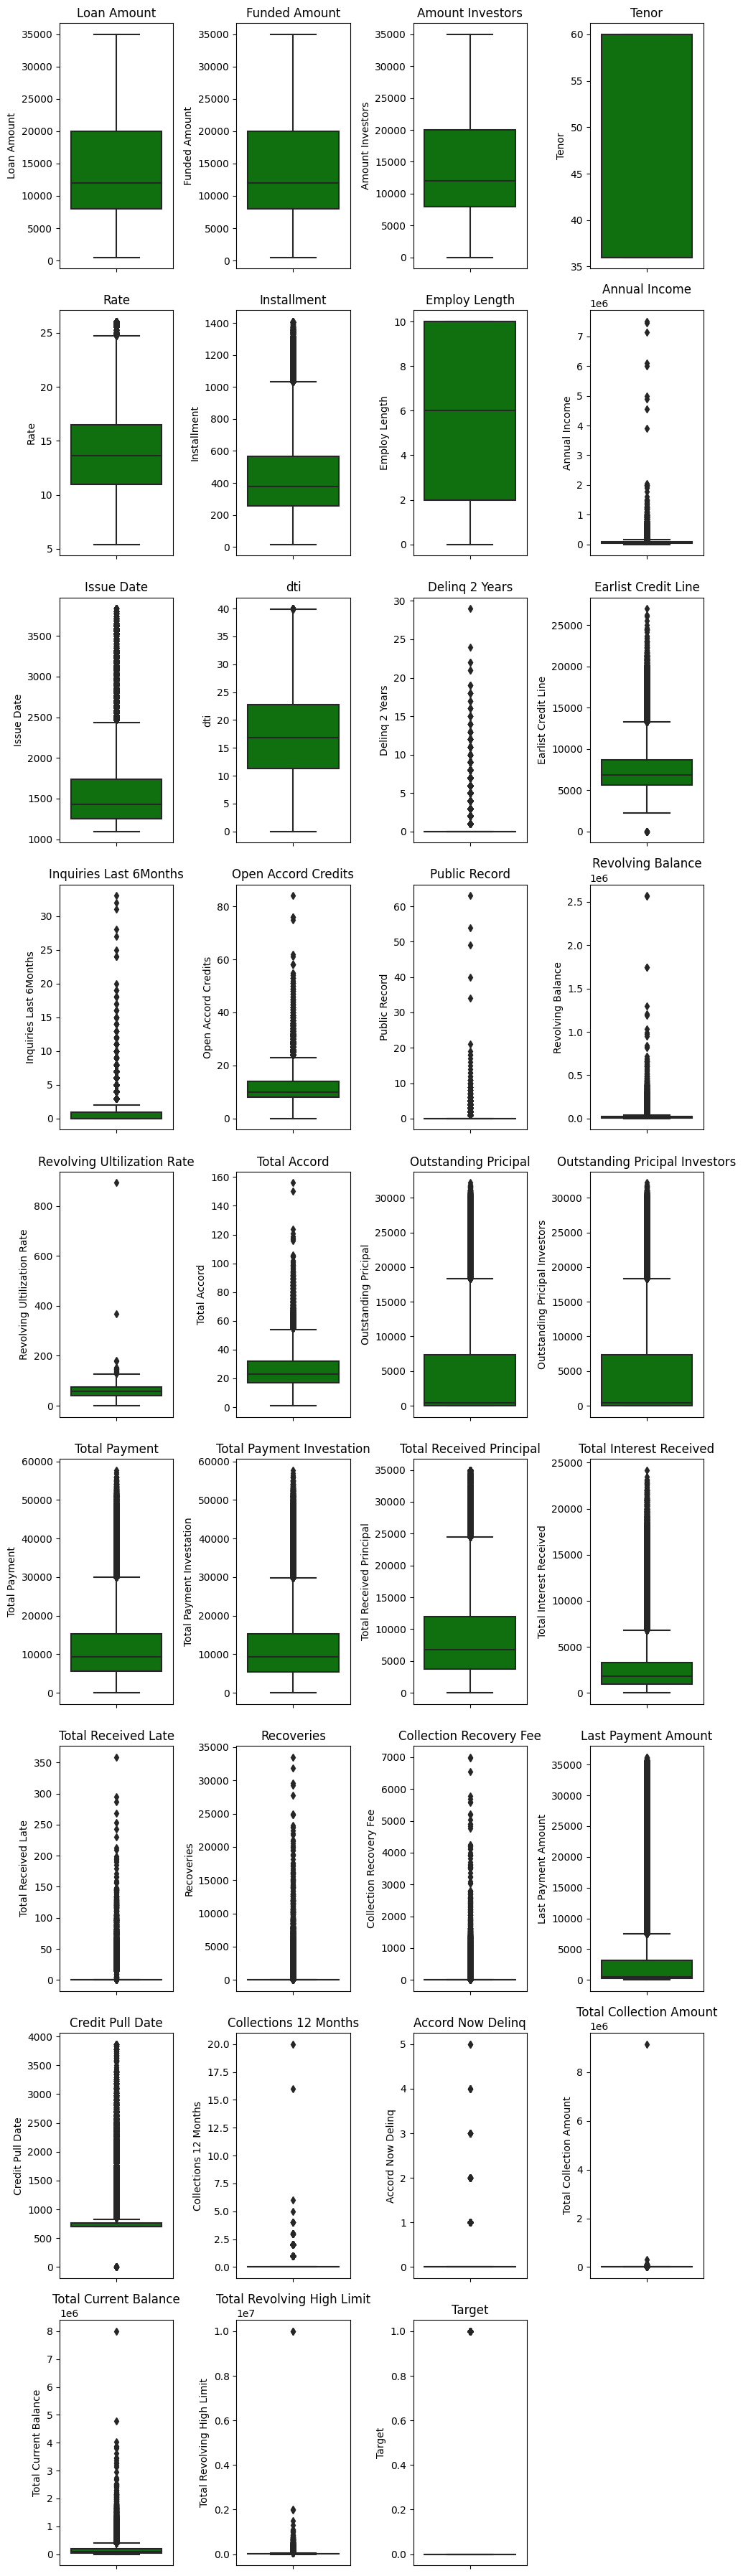

In [26]:
# Pilih kolom numerik
num_df = data.select_dtypes(include=[ 'float64','int32','int64'])

# Tentukan jumlah kolom per baris dan per kolom
num_cols = 4
num_rows = (len(num_df.columns) + num_cols - 1) // num_cols

# Buat subplot
plt.figure(figsize=(10, 4 * num_rows))
for i, col in enumerate(num_df.columns):
    plt.subplot(num_rows, num_cols, i + 1)
    sns.boxplot(y=data[col], color='green')
    plt.title(col)
    plt.tight_layout()

plt.show()

In [27]:
num_df.sample(2)

,Loan Amount,Funded Amount,Amount Investors,Tenor,Rate,Installment,Employ Length,Annual Income,Issue Date,dti,Delinq 2 Years,Earlist Credit Line,Inquiries Last 6Months,Open Accord Credits,Public Record,Revolving Balance,Revolving Ultilization Rate,Total Accord,Outstanding Pricipal,Outstanding Pricipal Investors,Total Payment,Total Payment Investation,Total Received Principal,Total Interest Received,Total Received Late,Recoveries,Collection Recovery Fee,Last Payment Amount,Credit Pull Date,Collections 12 Months,Accord Now Delinq,Total Collection Amount,Total Current Balance,Total Revolving High Limit,Target
94298,3500,3500,3500.0,36,13.68,119.08,10,37000.0,1552,9.50,0.0,6575.0,0.0,8.0,0.0,4407,77.3,18.0,905.54,905.54,3334.19,3334.19,2594.46,739.73,0.0,0.0,0.0,119.08,700.0,0.0,0.0,0.0,8575.0,5700.0,0
451911,25600,25600,25600.0,60,15.61,617.25,10,99000.0,1430,8.35,0.0,11657.0,0.0,9.0,0.0,32261,73.7,22.0,18036.10,18036.10,14196.75,14196.75,7563.90,6632.85,0.0,0.0,0.0,617.25,700.0,0.0,0.0,0.0,32261.0,43800.0,0


In [28]:
# menghandle outlier menggunakan Z-score
from scipy import stats
cols = ['Installment','Annual Income','dti','Delinq 2 Years','Inquiries Last 6Months',	'Open Accord Credits','Public Record','Revolving Balance',
        'Revolving Ultilization Rate','Rate','Total Accord',	'Outstanding Pricipal',	'Outstanding Pricipal Investors','Total Payment','Total Payment Investation',
        'Total Received Principal','Total Interest Received','Total Received Late','Recoveries','Collection Recovery Fee','Last Payment Amount',
        'Collections 12 Months','Accord Now Delinq','Total Collection Amount','Total Current Balance',	'Total Revolving High Limit','Earlist Credit Line',
        'Issue Date']
z_scores = np.abs(stats.zscore(data[cols]))
filtered_entries = (z_scores < 3).all(axis=1)
handle_out=data[filtered_entries]
handle_out.describe().T

,count,mean,std,min,25%,50%,75%,max
Loan Amount,366082.0,12727.156894,6787.638848,1000.00,7500.0000,12000.000,17375.00000,35000.0000
Funded Amount,366082.0,12704.251438,6769.595691,1000.00,7500.0000,12000.000,17200.00000,35000.0000
Amount Investors,366082.0,12685.784116,6763.157125,400.00,7500.0000,11950.000,17100.00000,35000.0000
Tenor,366082.0,41.734387,10.234373,36.00,36.0000,36.000,36.00000,60.0000
Rate,366082.0,13.433545,4.194496,5.42,10.3700,13.230,16.02000,26.0600
Installment,366082.0,387.413483,200.000879,19.87,243.2375,352.660,503.93000,1162.4300
Employ Length,366082.0,5.658645,3.739975,0.00,2.0000,6.000,10.00000,10.0000
Annual Income,366082.0,65492.392231,32033.135036,3000.00,43000.0000,60000.000,80000.00000,238000.0000
Issue Date,366082.0,1539.594733,379.663659,1096.00,1249.0000,1430.000,1705.00000,2860.0000
dti,366082.0,17.280816,7.839765,0.00,11.4200,16.920,22.85000,39.9900


In [29]:
handle_out.sample(2)

,Loan Amount,Funded Amount,Amount Investors,Tenor,Rate,Installment,Grade,Employ Title,Employ Length,Home Ownership,Annual Income,Verification Status,Issue Date,Payment Plan,Purpose,Addres States,dti,Delinq 2 Years,Earlist Credit Line,Inquiries Last 6Months,Open Accord Credits,Public Record,Revolving Balance,Revolving Ultilization Rate,Total Accord,Initial status,Outstanding Pricipal,Outstanding Pricipal Investors,Total Payment,Total Payment Investation,Total Received Principal,Total Interest Received,Total Received Late,Recoveries,Collection Recovery Fee,Last Payment Amount,Credit Pull Date,Collections 12 Months,Accord Now Delinq,Total Collection Amount,Total Current Balance,Total Revolving High Limit,Target
457070,15000,15000,15000.0,36,12.85,504.33,B,Driver,6,RENT,44500.0,Not Verified,1430,n,debt_consolidation,FL,25.46,0.0,5052.0,2.0,7.0,0.0,12953,66.4,11.0,w,6089.92,6089.92,11599.59,11599.59,8910.08,2689.51,0.0,0.0,0.0,504.33,700.0,0.0,0.0,0.0,37103.0,19500.0,0
384354,21000,21000,21000.0,60,16.99,521.80,D,Attorney,10,MORTGAGE,86500.0,Source Verified,1310,n,debt_consolidation,OK,23.65,0.0,6331.0,1.0,17.0,1.0,16491,58.5,23.0,w,16145.32,16145.32,9914.20,9914.20,4854.68,5059.52,0.0,0.0,0.0,521.80,700.0,0.0,0.0,66.0,253601.0,28200.0,0


In [30]:
handle_out.shape

(366082, 43)

## Class Imbalance

In [31]:
# Cross cek jumlah target
count_class_0, count_class_1 = handle_out.Target.value_counts()
print(count_class_0)
print(count_class_1)

332470
33612


In [32]:
# Divide by Class
df_class_0 = handle_out[handle_out['Target']==0]
df_class_1 = handle_out[handle_out['Target']==1]
print(df_class_0.shape)
print(df_class_1.shape)

(332470, 43)
(33612, 43)


In [33]:
df_class_0.sample(count_class_1).shape

(33612, 43)

In [34]:
df_class_0_under = df_class_0.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under,df_class_1],axis=0)

print('Random Under Sampling:')
print(df_test_under.Target.value_counts())
print(df_test_under.shape)

Random Under Sampling:
Target
0    33612
1    33612
Name: count, dtype: int64
(67224, 43)


In [35]:
df_test_under.sample(2)

,Loan Amount,Funded Amount,Amount Investors,Tenor,Rate,Installment,Grade,Employ Title,Employ Length,Home Ownership,Annual Income,Verification Status,Issue Date,Payment Plan,Purpose,Addres States,dti,Delinq 2 Years,Earlist Credit Line,Inquiries Last 6Months,Open Accord Credits,Public Record,Revolving Balance,Revolving Ultilization Rate,Total Accord,Initial status,Outstanding Pricipal,Outstanding Pricipal Investors,Total Payment,Total Payment Investation,Total Received Principal,Total Interest Received,Total Received Late,Recoveries,Collection Recovery Fee,Last Payment Amount,Credit Pull Date,Collections 12 Months,Accord Now Delinq,Total Collection Amount,Total Current Balance,Total Revolving High Limit,Target
409777,13600,13600,13600.0,36,12.49,454.91,B,Tug Mate,1,MORTGAGE,109000.0,Not Verified,1340,n,debt_consolidation,NJ,16.01,0.0,5966.0,0.0,19.0,0.0,21219,60.1,30.0,f,0.0,0.0,15692.33,15692.33,13600.00,2092.33,0.0,0.00,0.0000,7958.86,700.0,0.0,0.0,0.0,251616.0,35300.0,0
309967,9000,9000,9000.0,36,13.35,304.77,C,lift truck operator,10,MORTGAGE,36000.0,Not Verified,1187,n,debt_consolidation,GA,12.03,0.0,4870.0,0.0,4.0,0.0,2182,75.2,19.0,f,0.0,0.0,3477.72,3477.72,1481.22,652.17,0.0,1344.33,241.9794,304.77,822.0,0.0,0.0,0.0,97860.0,2900.0,1


In [36]:
df = df_test_under.copy()

In [37]:
# menampilkan type data unik yg ada dalam dataframe
df.dtypes.unique()

array([dtype('int64'), dtype('float64'), dtype('int32'), dtype('O')],
      dtype=object)

## Feature Transform & Standarisasi for Class Imbalance

In [38]:
cat = [col for col in df.select_dtypes(include='object').columns.tolist()]
cat

['Grade',
 'Employ Title',
 'Home Ownership',
 'Verification Status',
 'Payment Plan',
 'Purpose',
 'Addres States',
 'Initial status']

In [39]:
df= df.drop(columns=['Employ Title','Payment Plan','Initial status'],axis=1)

In [40]:
cat = [col for col in df.select_dtypes(include='object').columns.tolist()]
hot = pd.get_dummies(df[cat])
hot = hot.astype(int)
hot

,Grade_A,Grade_B,Grade_C,Grade_D,Grade_E,Grade_F,Grade_G,Home Ownership_MORTGAGE,Home Ownership_NONE,Home Ownership_OTHER,Home Ownership_OWN,Home Ownership_RENT,Verification Status_Not Verified,Verification Status_Source Verified,Verification Status_Verified,Purpose_car,Purpose_credit_card,Purpose_debt_consolidation,Purpose_educational,Purpose_home_improvement,Purpose_house,Purpose_major_purchase,Purpose_medical,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Addres States_AK,Addres States_AL,Addres States_AR,Addres States_AZ,Addres States_CA,Addres States_CO,Addres States_CT,Addres States_DC,Addres States_DE,Addres States_FL,Addres States_GA,Addres States_HI,Addres States_IA,Addres States_ID,Addres States_IL,Addres States_IN,Addres States_KS,Addres States_KY,Addres States_LA,Addres States_MA,Addres States_MD,Addres States_MI,Addres States_MN,Addres States_MO,Addres States_MS,Addres States_MT,Addres States_NC,Addres States_NE,Addres States_NH,Addres States_NJ,Addres States_NM,Addres States_NV,Addres States_NY,Addres States_OH,Addres States_OK,Addres States_OR,Addres States_PA,Addres States_RI,Addres States_SC,Addres States_SD,Addres States_TN,Addres States_TX,Addres States_UT,Addres States_VA,Addres States_VT,Addres States_WA,Addres States_WI,Addres States_WV,Addres States_WY
162871,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
87317,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
431423,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
333802,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
459551,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
466251,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
466252,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
466254,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
466256,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [41]:
num_df = df.select_dtypes(include=['int32','int64','float64'])
num_df.sample(2)

,Loan Amount,Funded Amount,Amount Investors,Tenor,Rate,Installment,Employ Length,Annual Income,Issue Date,dti,Delinq 2 Years,Earlist Credit Line,Inquiries Last 6Months,Open Accord Credits,Public Record,Revolving Balance,Revolving Ultilization Rate,Total Accord,Outstanding Pricipal,Outstanding Pricipal Investors,Total Payment,Total Payment Investation,Total Received Principal,Total Interest Received,Total Received Late,Recoveries,Collection Recovery Fee,Last Payment Amount,Credit Pull Date,Collections 12 Months,Accord Now Delinq,Total Collection Amount,Total Current Balance,Total Revolving High Limit,Target
53104,6000,6000,6000.0,36,12.99,202.14,5,65000.0,1461,22.19,0.0,6909.0,2.0,12.0,1.0,6832,13.1,18.0,2085.58,2085.58,5053.30,5053.30,3914.42,1138.88,0.0,0.0,0.0,202.14,700.0,0.0,0.0,0.0,256110.0,52000.0,0
351107,12000,12000,12000.0,36,11.67,396.69,2,40000.0,1249,15.93,0.0,2710.0,0.0,14.0,0.0,29429,40.0,16.0,7822.46,7822.46,5569.49,5569.49,4177.54,1391.95,0.0,0.0,0.0,412.52,700.0,0.0,0.0,0.0,61139.0,87200.0,1


In [42]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols = df[['Loan Amount','Funded Amount','Amount Investors','Tenor','Rate','Installment','Employ Length','Annual Income','Issue Date',	
           'dti','Delinq 2 Years','Earlist Credit Line','Inquiries Last 6Months','Open Accord Credits','Public Record','Revolving Balance',
           'Revolving Ultilization Rate','Total Accord','Outstanding Pricipal','Outstanding Pricipal Investors','Total Payment',
           'Total Payment Investation','Total Received Principal','Total Interest Received','Total Received Late','Recoveries','Collection Recovery Fee',
           'Last Payment Amount','Credit Pull Date','Collections 12 Months','Accord Now Delinq','Total Collection Amount','Total Current Balance',	
           'Total Revolving High Limit']]
for column in cols:
    df[column]= scaler.fit_transform(df[column].values.reshape(-1, 1))

In [43]:
cols.sample(2)

,Loan Amount,Funded Amount,Amount Investors,Tenor,Rate,Installment,Employ Length,Annual Income,Issue Date,dti,Delinq 2 Years,Earlist Credit Line,Inquiries Last 6Months,Open Accord Credits,Public Record,Revolving Balance,Revolving Ultilization Rate,Total Accord,Outstanding Pricipal,Outstanding Pricipal Investors,Total Payment,Total Payment Investation,Total Received Principal,Total Interest Received,Total Received Late,Recoveries,Collection Recovery Fee,Last Payment Amount,Credit Pull Date,Collections 12 Months,Accord Now Delinq,Total Collection Amount,Total Current Balance,Total Revolving High Limit
128212,10000,10000,10000.0,36,15.80,350.59,10,80000.0,1644,32.93,0.0,12144.0,2.0,12.0,1.0,11216,55.2,41.0,0.0,0.0,5609.44,5609.44,3870.86,1738.58,0.0,0.0,0.0,350.59,700.0,0.0,0.0,223.0,419480.0,17300.0
151207,10000,10000,10000.0,36,11.14,328.06,0,70000.0,1705,27.94,1.0,12328.0,1.0,10.0,0.0,15592,39.3,48.0,0.0,0.0,1640.15,1640.15,1198.06,442.09,0.0,0.0,0.0,328.06,700.0,0.0,0.0,0.0,86544.0,39700.0


In [44]:
# mengabungkan data hasil labeling dengan data standarisasi 
standar_df = pd.concat([hot, cols,df[['Target']]], axis=1).reset_index()
standar_df.sample(2)

,index,Grade_A,Grade_B,Grade_C,Grade_D,Grade_E,Grade_F,Grade_G,Home Ownership_MORTGAGE,Home Ownership_NONE,Home Ownership_OTHER,Home Ownership_OWN,Home Ownership_RENT,Verification Status_Not Verified,Verification Status_Source Verified,Verification Status_Verified,Purpose_car,Purpose_credit_card,Purpose_debt_consolidation,Purpose_educational,Purpose_home_improvement,Purpose_house,Purpose_major_purchase,Purpose_medical,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Addres States_AK,Addres States_AL,Addres States_AR,Addres States_AZ,Addres States_CA,Addres States_CO,Addres States_CT,Addres States_DC,Addres States_DE,Addres States_FL,Addres States_GA,Addres States_HI,Addres States_IA,Addres States_ID,Addres States_IL,Addres States_IN,Addres States_KS,Addres States_KY,Addres States_LA,Addres States_MA,Addres States_MD,Addres States_MI,Addres States_MN,Addres States_MO,Addres States_MS,Addres States_MT,Addres States_NC,Addres States_NE,Addres States_NH,Addres States_NJ,Addres States_NM,Addres States_NV,Addres States_NY,Addres States_OH,Addres States_OK,Addres States_OR,Addres States_PA,Addres States_RI,Addres States_SC,Addres States_SD,Addres States_TN,Addres States_TX,Addres States_UT,Addres States_VA,Addres States_VT,Addres States_WA,Addres States_WI,Addres States_WV,Addres States_WY,Loan Amount,Funded Amount,Amount Investors,Tenor,Rate,Installment,Employ Length,Annual Income,Issue Date,dti,Delinq 2 Years,Earlist Credit Line,Inquiries Last 6Months,Open Accord Credits,Public Record,Revolving Balance,Revolving Ultilization Rate,Total Accord,Outstanding Pricipal,Outstanding Pricipal Investors,Total Payment,Total Payment Investation,Total Received Principal,Total Interest Received,Total Received Late,Recoveries,Collection Recovery Fee,Last Payment Amount,Credit Pull Date,Collections 12 Months,Accord Now Delinq,Total Collection Amount,Total Current Balance,Total Revolving High Limit,Target
19652,336501,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27200,27200,27200.0,60,18.24,694.26,7,65000.0,1249,16.65,1.0,6392.0,2.0,23.0,0.0,24910,47.6,29.0,21798.99,21798.99,11802.42,11802.42,5401.01,6401.41,0.0,0.00,0.0000,694.26,700.0,0.0,0.0,0.0,24910.0,52300.0,0
34155,4225,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14675,14675,14650.0,60,19.42,384.08,1,38500.0,2222,22.66,0.0,7154.0,1.0,7.0,0.0,24520,93.6,17.0,0.00,0.00,10011.30,9994.29,3821.64,4626.05,0.0,1563.61,15.6361,33.66,1399.0,0.0,0.0,0.0,81539.0,22800.0,1


## Feature Transform & Standarisasi for K-fold

In [45]:
cat_k = [col for col in handle_out.select_dtypes(include='object').columns.tolist()]
handle_out= handle_out.drop(columns=['Employ Title', 'Payment Plan', 'Initial status'],axis=1)
handle_out.select_dtypes('object')

,Grade,Home Ownership,Verification Status,Purpose,Addres States
0,B,RENT,Verified,credit_card,AZ
2,C,RENT,Not Verified,small_business,IL
4,B,RENT,Source Verified,other,OR
5,A,RENT,Source Verified,wedding,AZ
6,C,RENT,Not Verified,debt_consolidation,NC
...,...,...,...,...,...
466278,D,RENT,Source Verified,vacation,VA
466279,B,RENT,Source Verified,credit_card,MD
466280,C,MORTGAGE,Source Verified,debt_consolidation,TX
466282,D,MORTGAGE,Verified,debt_consolidation,OH


In [46]:
# melakukan one hot encoder 
cat_k = [col for col in handle_out.select_dtypes(include='object').columns.tolist()]
one_hot_k = pd.get_dummies(handle_out[cat_k])
one_hot_k = one_hot_k.astype(int)

In [47]:
# melakukan standarisasi
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

cols_k = handle_out[['Loan Amount','Funded Amount','Amount Investors','Tenor','Rate','Installment','Employ Length','Annual Income','Issue Date',	
           'dti','Delinq 2 Years','Earlist Credit Line','Inquiries Last 6Months','Open Accord Credits','Public Record','Revolving Balance',
           'Revolving Ultilization Rate','Total Accord','Outstanding Pricipal','Outstanding Pricipal Investors','Total Payment',
           'Total Payment Investation','Total Received Principal','Total Interest Received','Total Received Late','Recoveries','Collection Recovery Fee',
           'Last Payment Amount','Credit Pull Date','Collections 12 Months','Accord Now Delinq','Total Collection Amount','Total Current Balance',	
           'Total Revolving High Limit']]
for column in cols_k:
    handle_out[column]= scaler.fit_transform(handle_out[column].values.reshape(-1, 1))

In [48]:
# menggabungkan hasil labeling dengan stadarisasi
standar_k = pd.concat([one_hot_k, cols_k,handle_out[['Target']]],axis=1).reset_index()
standar_k.sample(2)

,index,Grade_A,Grade_B,Grade_C,Grade_D,Grade_E,Grade_F,Grade_G,Home Ownership_ANY,Home Ownership_MORTGAGE,Home Ownership_NONE,Home Ownership_OTHER,Home Ownership_OWN,Home Ownership_RENT,Verification Status_Not Verified,Verification Status_Source Verified,Verification Status_Verified,Purpose_car,Purpose_credit_card,Purpose_debt_consolidation,Purpose_educational,Purpose_home_improvement,Purpose_house,Purpose_major_purchase,Purpose_medical,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Addres States_AK,Addres States_AL,Addres States_AR,Addres States_AZ,Addres States_CA,Addres States_CO,Addres States_CT,Addres States_DC,Addres States_DE,Addres States_FL,Addres States_GA,Addres States_HI,Addres States_IA,Addres States_ID,Addres States_IL,Addres States_IN,Addres States_KS,Addres States_KY,Addres States_LA,Addres States_MA,Addres States_MD,Addres States_ME,Addres States_MI,Addres States_MN,Addres States_MO,Addres States_MS,Addres States_MT,Addres States_NC,Addres States_NE,Addres States_NH,Addres States_NJ,Addres States_NM,Addres States_NV,Addres States_NY,Addres States_OH,Addres States_OK,Addres States_OR,Addres States_PA,Addres States_RI,Addres States_SC,Addres States_SD,Addres States_TN,Addres States_TX,Addres States_UT,Addres States_VA,Addres States_VT,Addres States_WA,Addres States_WI,Addres States_WV,Addres States_WY,Loan Amount,Funded Amount,Amount Investors,Tenor,Rate,Installment,Employ Length,Annual Income,Issue Date,dti,Delinq 2 Years,Earlist Credit Line,Inquiries Last 6Months,Open Accord Credits,Public Record,Revolving Balance,Revolving Ultilization Rate,Total Accord,Outstanding Pricipal,Outstanding Pricipal Investors,Total Payment,Total Payment Investation,Total Received Principal,Total Interest Received,Total Received Late,Recoveries,Collection Recovery Fee,Last Payment Amount,Credit Pull Date,Collections 12 Months,Accord Now Delinq,Total Collection Amount,Total Current Balance,Total Revolving High Limit,Target
121945,157319,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,24000,24000,23950.0,60,8.9,497.04,5,96000.0,1736,19.83,0.0,3136.0,0.0,11.0,0.0,552,2.9,15.0,11741.57,11717.12,16857.78000,16822.63,12258.43,4599.35,0.0,0.0,0.0,497.04,700.0,0.0,0.0,0.0,240154.0,18800.0,0
41701,58509,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,20400,20400,20400.0,60,17.1,508.10,10,70000.0,1491,9.51,1.0,6453.0,1.0,7.0,0.0,11350,89.4,17.0,0.00,0.00,22095.53087,22095.53,20400.00,1695.53,0.0,0.0,0.0,19557.34,700.0,0.0,0.0,0.0,223066.0,12700.0,0


## Feature Selection with Heatmap 

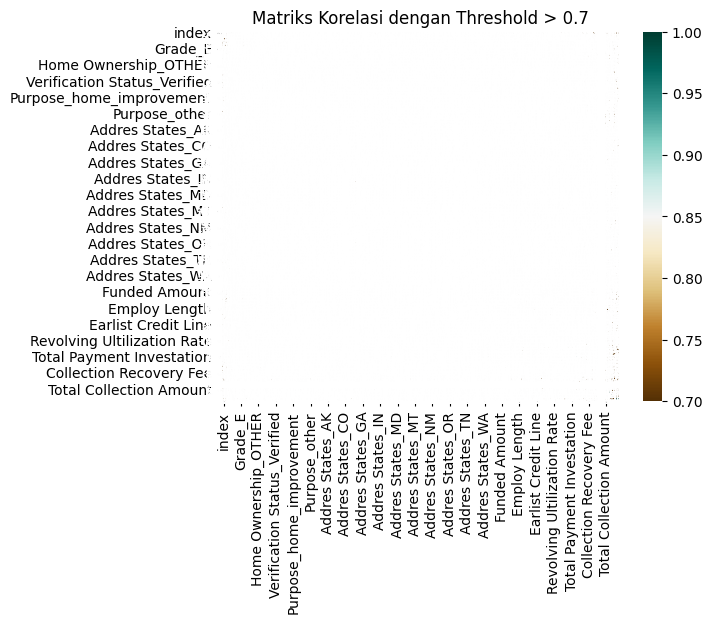

In [49]:
corrmat = standar_df.corr()
sns.heatmap(corrmat, cmap='BrBG', annot=True, vmin= 0.7)
plt.title("Matriks Korelasi dengan Threshold > 0.7")
plt.show()

In [50]:
standar_df.sample(2)

,index,Grade_A,Grade_B,Grade_C,Grade_D,Grade_E,Grade_F,Grade_G,Home Ownership_MORTGAGE,Home Ownership_NONE,Home Ownership_OTHER,Home Ownership_OWN,Home Ownership_RENT,Verification Status_Not Verified,Verification Status_Source Verified,Verification Status_Verified,Purpose_car,Purpose_credit_card,Purpose_debt_consolidation,Purpose_educational,Purpose_home_improvement,Purpose_house,Purpose_major_purchase,Purpose_medical,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding,Addres States_AK,Addres States_AL,Addres States_AR,Addres States_AZ,Addres States_CA,Addres States_CO,Addres States_CT,Addres States_DC,Addres States_DE,Addres States_FL,Addres States_GA,Addres States_HI,Addres States_IA,Addres States_ID,Addres States_IL,Addres States_IN,Addres States_KS,Addres States_KY,Addres States_LA,Addres States_MA,Addres States_MD,Addres States_MI,Addres States_MN,Addres States_MO,Addres States_MS,Addres States_MT,Addres States_NC,Addres States_NE,Addres States_NH,Addres States_NJ,Addres States_NM,Addres States_NV,Addres States_NY,Addres States_OH,Addres States_OK,Addres States_OR,Addres States_PA,Addres States_RI,Addres States_SC,Addres States_SD,Addres States_TN,Addres States_TX,Addres States_UT,Addres States_VA,Addres States_VT,Addres States_WA,Addres States_WI,Addres States_WV,Addres States_WY,Loan Amount,Funded Amount,Amount Investors,Tenor,Rate,Installment,Employ Length,Annual Income,Issue Date,dti,Delinq 2 Years,Earlist Credit Line,Inquiries Last 6Months,Open Accord Credits,Public Record,Revolving Balance,Revolving Ultilization Rate,Total Accord,Outstanding Pricipal,Outstanding Pricipal Investors,Total Payment,Total Payment Investation,Total Received Principal,Total Interest Received,Total Received Late,Recoveries,Collection Recovery Fee,Last Payment Amount,Credit Pull Date,Collections 12 Months,Accord Now Delinq,Total Collection Amount,Total Current Balance,Total Revolving High Limit,Target
58751,324823,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,12000,12000,12000.0,36,13.98,410.02,2,74000.0,1218,12.84,2.0,7093.0,1.0,11.0,1.0,8060,73.3,19.0,7916.66,7916.66,5740.28,5740.28,4083.34,1656.94,0.0,0.0,0.0,410.02,700.0,0.0,0.0,0.0,329204.0,11000.0,1
39946,79767,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,19425,19425,19425.0,36,21.70,738.84,0,62000.0,1522,14.55,0.0,5389.0,0.0,6.0,0.0,12537,90.8,21.0,9066.51,9066.51,16254.20,16254.20,10358.49,5895.71,0.0,0.0,0.0,738.84,700.0,0.0,0.0,0.0,16705.0,13800.0,1


## Evaluasi Model for Hold Out

In [51]:
df_baru = standar_df[['Grade_A','Grade_F','Home Ownership_OTHER','Verification Status_Verified','Purpose_home_improvement','Purpose_other','Addres States_AK',
              'Addres States_CO','Addres States_GA','Addres States_KS','Addres States_MI','Addres States_NC','Addres States_NV','Addres States_PA',
              'Addres States_TX','Addres States_WI','Amount Investors','Annual Income','Inquiries Last 6Months','Total Accord','Total Received Principal',
              'Last Payment Amount','Total Current Balance','Target']]
df_baru

,Grade_A,Grade_F,Home Ownership_OTHER,Verification Status_Verified,Purpose_home_improvement,Purpose_other,Addres States_AK,Addres States_CO,Addres States_GA,Addres States_KS,Addres States_MI,Addres States_NC,Addres States_NV,Addres States_PA,Addres States_TX,Addres States_WI,Amount Investors,Annual Income,Inquiries Last 6Months,Total Accord,Total Received Principal,Last Payment Amount,Total Current Balance,Target
0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,13225.0,44000.0,2.0,32.0,13225.00,1741.60,42091.0,0
1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,12375.0,42000.0,1.0,19.0,4258.95,312.64,8300.0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8325.0,187000.0,1.0,22.0,2495.13,185.15,237953.0,0
3,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,12500.0,44500.0,2.0,30.0,2585.19,305.91,219550.0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,14675.0,47775.0,1.0,26.0,8541.77,517.67,37624.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67219,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,9000.0,140000.0,4.0,41.0,5847.72,100.00,21265.0,1
67220,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6000.0,45000.0,2.0,29.0,1132.29,203.70,135047.0,1
67221,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,6000.0,45600.0,0.0,13.0,163.71,170.53,1199.0,1
67222,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,15000.0,50000.0,0.0,34.0,3436.71,534.72,34157.0,1


In [52]:
from sklearn.utils import resample
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import xgboost as xgb
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix,f1_score,roc_auc_score,roc_curve,accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import KFold
from sklearn.metrics import mean_squared_error

In [53]:
# split dataset for Class Imbalance
X = df_baru.drop(['Target'], axis=1)
y = df_baru[['Target']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

## Linier Regression

In [54]:
from sklearn.linear_model import LinearRegression
regresor = LinearRegression()
regresor.fit(X_train,y_train)
y_pred = regresor.predict(X_test)

print(regresor.intercept_)
print("----------------------------------------------------------------------------")
print(regresor.coef_)
print("----------------------------------------------------------------------------")
from sklearn import metrics
print('Mean Absolut Error:', metrics.mean_absolute_error(y_test, y_pred) )
print('Mean Square Error :', metrics.mean_squared_error(y_test,y_pred))
print('Root Mean Square Error:', np.sqrt(metrics.mean_squared_error(y_test,y_pred)))
print('Model R^2 Square value ',metrics.r2_score(y_test,y_pred))

[0.6393735]
----------------------------------------------------------------------------
[[-8.55608111e-02  4.52873745e-03  2.82247205e-01  7.08429842e-02
  -1.90214712e-02  1.94885967e-02 -6.51159037e-02 -3.61209543e-02
  -1.72109810e-02 -5.28454752e-02 -2.14713130e-02 -1.20450035e-02
   2.71748336e-02 -2.25268079e-02 -2.79249767e-02 -4.27634956e-02
   1.97032759e-05 -1.04366325e-06  3.80491312e-02 -5.22579561e-04
  -5.25649807e-05 -6.57578145e-06 -2.38147897e-07]]
----------------------------------------------------------------------------
Mean Absolut Error: 0.36870156398276666
Mean Square Error : 0.17280440061029037
Root Mean Square Error: 0.41569748689436453
Model R^2 Square value  0.3087399717673376


## Logistic Regression

In [55]:
LR = LogisticRegression(random_state=42)
LR.fit(X_train,y_train)
y_pred = LR.predict(X_test)

# Evaluasi model 
confusion_mat = confusion_matrix(y_test,y_pred)
classification_rep = classification_report(y_test,y_pred)
# menampilkan hasil output
print('Confusian Matrik: ')
print(confusion_mat)
print("----------------------------------------------------------------------------")
print('Acccuracy:', accuracy_score(y_pred,y_test))
print()
print(classification_report(y_test,y_pred))


f:\Anaconda\envs\tutorial_notebook\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Confusian Matrik: 
[[6994 3011]
 [2121 8042]]
----------------------------------------------------------------------------
Acccuracy: 0.7455374851249504

              precision    recall  f1-score   support

           0       0.77      0.70      0.73     10005
           1       0.73      0.79      0.76     10163

    accuracy                           0.75     20168
   macro avg       0.75      0.75      0.74     20168
weighted avg       0.75      0.75      0.74     20168



## Decision Tree

In [56]:
clf_tree = DecisionTreeClassifier(criterion='entropy',random_state=42, max_depth=50, min_samples_leaf=150)
clf_tree.fit(X_train,y_train)
y_pred = clf_tree.predict(X_test)

# Evaluasi model 
confusion_mat = confusion_matrix(y_test,y_pred)
classification_rep = classification_report(y_test,y_pred)
# menampilkan hasil output
print('Confusian Matrik: ')
print(confusion_mat)
print("----------------------------------------------------------------------------")
print('Acccuracy:', accuracy_score(y_pred,y_test))
print()
print(classification_report(y_test,y_pred))


Confusian Matrik: 
[[8433 1572]
 [2315 7848]]
----------------------------------------------------------------------------
Acccuracy: 0.8072689408964696

              precision    recall  f1-score   support

           0       0.78      0.84      0.81     10005
           1       0.83      0.77      0.80     10163

    accuracy                           0.81     20168
   macro avg       0.81      0.81      0.81     20168
weighted avg       0.81      0.81      0.81     20168



## Random Forest Classifier

In [57]:
radm_clf =RandomForestClassifier(criterion='gini',n_estimators=100,random_state=42)
radm_clf.fit(X_train,y_train)
y_pred = radm_clf.predict(X_test)

# Evaluasi model 
confusion_mat = confusion_matrix(y_test,y_pred)
classification_rep = classification_report(y_test,y_pred)
# menampilkan hasil output
print('Confusian Matrik: ')
print(confusion_mat)
print("----------------------------------------------------------------------------")
print('Acccuracy:', accuracy_score(y_pred,y_test))
print()
print(classification_report(y_test,y_pred))


f:\Anaconda\envs\tutorial_notebook\Lib\site-packages\sklearn\base.py:1151: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Confusian Matrik: 
[[8353 1652]
 [1941 8222]]
----------------------------------------------------------------------------
Acccuracy: 0.8218464894882983

              precision    recall  f1-score   support

           0       0.81      0.83      0.82     10005
           1       0.83      0.81      0.82     10163

    accuracy                           0.82     20168
   macro avg       0.82      0.82      0.82     20168
weighted avg       0.82      0.82      0.82     20168



## KNeighbors Classifier

In [58]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3, weights='distance',metric='euclidean')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Evaluasi model 
confusion_mat = confusion_matrix(y_test,y_pred)
classification_rep = classification_report(y_test,y_pred)

# menampilkan hasil output 
print('Confusion Metrik:')
print(confusion_mat)
print("----------------------------------------------------------------------------")
print()
print(classification_report(y_test,y_pred))

f:\Anaconda\envs\tutorial_notebook\Lib\site-packages\sklearn\neighbors\_classification.py:228: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Confusion Metrik:
[[7198 2807]
 [2581 7582]]
----------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.74      0.72      0.73     10005
           1       0.73      0.75      0.74     10163

    accuracy                           0.73     20168
   macro avg       0.73      0.73      0.73     20168
weighted avg       0.73      0.73      0.73     20168



## AdaBoost

In [70]:
from sklearn.ensemble import AdaBoostClassifier
adaB = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=42,
)
adaB.fit(X_train,y_train)
y_pred = adaB.predict(X_test)
## Evaluasi Model 
confusion_mat = confusion_matrix(y_test,y_pred)
classification_rep =classification_report(y_test,y_pred)

# Menampilkan Hasil Output
print('Confusion Matrik')
print(confusion_mat)
print("----------------------------------------------------------------------------")
print(classification_report(y_test,y_pred))

Confusion Matrik
[[7666 2339]
 [1947 8216]]
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.80      0.77      0.78     10005
           1       0.78      0.81      0.79     10163

    accuracy                           0.79     20168
   macro avg       0.79      0.79      0.79     20168
weighted avg       0.79      0.79      0.79     20168



## XG boost

In [59]:
import xgboost as xgb
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(X_train,y_train)
y_pred = xgb.predict(X_test)

# Evaluasi Model 
confusion_mat = confusion_matrix(y_test,y_pred)
classification_rep =classification_report(y_test,y_pred)

# Menampilkan Hasil Output
print('Confusion Matrik')
print(confusion_mat)
print("----------------------------------------------------------------------------")
print(classification_report(y_test,y_pred))

f:\Anaconda\envs\tutorial_notebook\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
f:\Anaconda\envs\tutorial_notebook\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
f:\Anaconda\envs\tutorial_notebook\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
f:\Anaconda\envs\tutorial_notebook\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

Confusion Matrik
[[8750 1255]
 [2032 8131]]
----------------------------------------------------------------------------

              precision    recall  f1-score   support

           0       0.81      0.87      0.84     10005
           1       0.87      0.80      0.83     10163

    accuracy                           0.84     20168
   macro avg       0.84      0.84      0.84     20168
weighted avg       0.84      0.84      0.84     20168



f:\Anaconda\envs\tutorial_notebook\Lib\site-packages\xgboost\data.py:335: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
f:\Anaconda\envs\tutorial_notebook\Lib\site-packages\xgboost\data.py:338: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  is_categorical_dtype(dtype) or is_pa_ext_categorical_dtype(dtype)
f:\Anaconda\envs\tutorial_notebook\Lib\site-packages\xgboost\data.py:384: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype):
f:\Anaconda\envs\tutorial_notebook\Lib\site-packages\xgboost\data.py:359: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or i

Dari hasil Evaluasi Model dengan Model Validation (Hold Out) didapat model terbaik ada pada model yang menggunaka algoritma XGBoost 

## Evaluasi Model With K-Fold 

### Linear Regression

In [62]:
# Memisahan dataset yang akan diakan dilakukan train test
data_kfold = standar_k.copy()
data_kfold  

X = data_kfold.drop(columns='Target')
y = data_kfold['Target']

# Inisialisasi KFold
kf = KFold(n_splits=10, shuffle=True, random_state=42)
k = 10

In [63]:
# Model yang ingin Anda latih (misalnya, Linear Regression)
LinearReg = LinearRegression()

# List untuk menyimpan skor performa model pada setiap fold
scores = []

# Melakukan K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train_k, X_test_k = X.iloc[train_index], X.iloc[test_index]
    y_train_k, y_test_k = y.iloc[train_index], y.iloc[test_index]

    # Melatih model pada data pelatihan
    LinearReg.fit(X_train_k, y_train_k)

    # Melakukan prediksi pada data validasi
    y_pred_k = LinearReg.predict(X_test_k)

    # Mengukur performa model menggunakan Mean Squared Error
    mse = mean_squared_error(y_test_k, y_pred_k)
    scores.append(mse)

# Menampilkan skor performa model pada setiap fold
for i, score in enumerate(scores, start=1):
    print(f"Fold {i}: Mean Squared Error = {score:.2f}")

# Menampilkan rata-rata skor performa dari semua fold
print(f"Rata-rata MSE dari {k}-Fold Cross-Validation: {np.mean(scores):.2f}")


Fold 1: Mean Squared Error = 0.03
Fold 2: Mean Squared Error = 0.03
Fold 3: Mean Squared Error = 0.03
Fold 4: Mean Squared Error = 0.03
Fold 5: Mean Squared Error = 0.03
Fold 6: Mean Squared Error = 0.03
Fold 7: Mean Squared Error = 0.03
Fold 8: Mean Squared Error = 0.03
Fold 9: Mean Squared Error = 0.03
Fold 10: Mean Squared Error = 0.03
Rata-rata MSE dari 10-Fold Cross-Validation: 0.03


### Random Forest Classifier

In [71]:
# Model yang ingin Anda latih (misalnya, Linear Regression)
Random_forest = RandomForestClassifier(criterion='gini',
                                       n_estimators=100,
                                       random_state=42)

# List untuk menyimpan skor performa model pada setiap fold
scores = []

# Melakukan K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train_k, X_test_k = X.iloc[train_index], X.iloc[test_index]
    y_train_k, y_test_k = y.iloc[train_index], y.iloc[test_index]

    # Melatih model pada data pelatihan
    Random_forest.fit(X_train_k, y_train_k)

    # Melakukan prediksi pada data validasi
    y_pred_k = Random_forest.predict(X_test_k)

    # Mengukur performa model menggunakan Mean Squared Error
    mse = mean_squared_error(y_test_k, y_pred_k)
    scores.append(mse)

# Evaluasi Model 
confusion_mat = confusion_matrix(y_test_k,y_pred_k)
classification_rep =classification_report(y_test_k,y_pred_k)

# Menampilkan Hasil Output
print('Confusion Matrik')
print(confusion_mat)
print("----------------------------------------------------------------------------")
print(classification_report(y_test_k,y_pred_k))

# Menampilkan skor performa model pada setiap fold
for i, score in enumerate(scores, start=1):
    print(f"Fold {i}: Mean Squared Error = {score:.2f}")

# Menampilkan rata-rata skor performa dari semua fold
print(f"Rata-rata MSE dari {k}-Fold Cross-Validation: {np.mean(scores):.2f}")


Confusion Matrik
[[33244     1]
 [  592  2771]]
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     33245
           1       1.00      0.82      0.90      3363

    accuracy                           0.98     36608
   macro avg       0.99      0.91      0.95     36608
weighted avg       0.98      0.98      0.98     36608

Fold 1: Mean Squared Error = 0.02
Fold 2: Mean Squared Error = 0.02
Fold 3: Mean Squared Error = 0.01
Fold 4: Mean Squared Error = 0.02
Fold 5: Mean Squared Error = 0.01
Fold 6: Mean Squared Error = 0.02
Fold 7: Mean Squared Error = 0.02
Fold 8: Mean Squared Error = 0.01
Fold 9: Mean Squared Error = 0.02
Fold 10: Mean Squared Error = 0.02
Rata-rata MSE dari 10-Fold Cross-Validation: 0.02


### Decision Tree Classifier

In [64]:
# Model yang ingin Anda latih (misalnya, Linear Regression)
Decision = DecisionTreeClassifier(criterion='entropy',
                                  random_state=42, 
                                  max_depth=50, 
                                  min_samples_leaf=150)

# List untuk menyimpan skor performa model pada setiap fold
scores = []

# Melakukan K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train_k, X_test_k = X.iloc[train_index], X.iloc[test_index]
    y_train_k, y_test_k = y.iloc[train_index], y.iloc[test_index]

    # Melatih model pada data pelatihan
    Decision.fit(X_train_k, y_train_k)

    # Melakukan prediksi pada data validasi
    y_pred_k = Decision.predict(X_test_k)

    # Mengukur performa model menggunakan Mean Squared Error
    mse = mean_squared_error(y_test_k, y_pred_k)
    scores.append(mse)

# Evaluasi Model 
confusion_mat = confusion_matrix(y_test_k,y_pred_k)
classification_rep =classification_report(y_test_k,y_pred_k)

# Menampilkan Hasil Output
print('Confusion Matrik')
print(confusion_mat)
print("----------------------------------------------------------------------------")
print(classification_report(y_test_k,y_pred_k))

# Menampilkan skor performa model pada setiap fold
for i, score in enumerate(scores, start=1):
    print(f"Fold {i}: Mean Squared Error = {score:.2f}")

# Menampilkan rata-rata skor performa dari semua fold
print(f"Rata-rata MSE dari {k}-Fold Cross-Validation: {np.mean(scores):.2f}")


Confusion Matrik
[[33188    57]
 [  615  2748]]
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     33245
           1       0.98      0.82      0.89      3363

    accuracy                           0.98     36608
   macro avg       0.98      0.91      0.94     36608
weighted avg       0.98      0.98      0.98     36608

Fold 1: Mean Squared Error = 0.02
Fold 2: Mean Squared Error = 0.02
Fold 3: Mean Squared Error = 0.02
Fold 4: Mean Squared Error = 0.02
Fold 5: Mean Squared Error = 0.02
Fold 6: Mean Squared Error = 0.02
Fold 7: Mean Squared Error = 0.02
Fold 8: Mean Squared Error = 0.02
Fold 9: Mean Squared Error = 0.02
Fold 10: Mean Squared Error = 0.02
Rata-rata MSE dari 10-Fold Cross-Validation: 0.02


### Randomized Decision Trees

In [65]:
# Model yang ingin Anda latih (misalnya, Linear Regression)
Random = RandomForestClassifier(criterion='gini',
                                n_estimators=100,
                                bootstrap=True,
                                max_features='sqrt',
                                min_samples_split=2,
                                min_samples_leaf=1,
                                random_state=42,
                                class_weight='balanced')

# List untuk menyimpan skor performa model pada setiap fold
scores = []

# Melakukan K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train_k, X_test_k = X.iloc[train_index], X.iloc[test_index]
    y_train_k, y_test_k = y.iloc[train_index], y.iloc[test_index]

    # Melatih model pada data pelatihan
    Random.fit(X_train_k, y_train_k)

    # Melakukan prediksi pada data validasi
    y_pred_k = Random.predict(X_test_k)

    # Mengukur performa model menggunakan Mean Squared Error
    mse = mean_squared_error(y_test_k, y_pred_k)
    scores.append(mse)

# Evaluasi Model 
confusion_mat = confusion_matrix(y_test_k,y_pred_k)
classification_rep =classification_report(y_test_k,y_pred_k)

# Menampilkan Hasil Output
print('Confusion Matrik')
print(confusion_mat)
print("----------------------------------------------------------------------------")
print(classification_report(y_test_k,y_pred_k))

# Menampilkan skor performa model pada setiap fold
for i, score in enumerate(scores, start=1):
    print(f"Fold {i}: Mean Squared Error = {score:.2f}")

# Menampilkan rata-rata skor performa dari semua fold
print(f"Rata-rata MSE dari {k}-Fold Cross-Validation: {np.mean(scores):.2f}")

Confusion Matrik
[[33245     0]
 [  592  2771]]
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     33245
           1       1.00      0.82      0.90      3363

    accuracy                           0.98     36608
   macro avg       0.99      0.91      0.95     36608
weighted avg       0.98      0.98      0.98     36608

Fold 1: Mean Squared Error = 0.02
Fold 2: Mean Squared Error = 0.02
Fold 3: Mean Squared Error = 0.01
Fold 4: Mean Squared Error = 0.02
Fold 5: Mean Squared Error = 0.01
Fold 6: Mean Squared Error = 0.02
Fold 7: Mean Squared Error = 0.02
Fold 8: Mean Squared Error = 0.01
Fold 9: Mean Squared Error = 0.02
Fold 10: Mean Squared Error = 0.02
Rata-rata MSE dari 10-Fold Cross-Validation: 0.02


### XGBoost Classifier

In [66]:
# Settings the warnings to be ignored
import warnings
warnings.filterwarnings('ignore')

# Model yang ingin Anda latih (misalnya, Linear Regression)
XGBoo = XGBClassifier()

# List untuk menyimpan skor performa model pada setiap fold
scores = []

# Melakukan K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train_k, X_test_k = X.iloc[train_index], X.iloc[test_index]
    y_train_k, y_test_k = y.iloc[train_index], y.iloc[test_index]

    # Melatih model pada data pelatihan
    XGBoo.fit(X_train_k, y_train_k)

    # Melakukan prediksi pada data validasi
    y_pred_k = XGBoo.predict(X_test_k)

    # Mengukur performa model menggunakan Mean Squared Error
    mse = mean_squared_error(y_test_k, y_pred_k)
    scores.append(mse)

# Evaluasi Model 
confusion_mat = confusion_matrix(y_test_k,y_pred_k)
classification_rep =classification_report(y_test_k,y_pred_k)

# Menampilkan Hasil Output
print('Confusion Matrik')
print(confusion_mat)
print("----------------------------------------------------------------------------")
print(classification_report(y_test_k,y_pred_k))

# Menampilkan skor performa model pada setiap fold
for i, score in enumerate(scores, start=1):
    print(f"Fold {i}: Mean Squared Error = {score:.2f}")

# Menampilkan rata-rata skor performa dari semua fold
print(f"Rata-rata MSE dari {k}-Fold Cross-Validation: {np.mean(scores):.2f}")


Confusion Matrik
[[33242     3]
 [  265  3098]]
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     33245
           1       1.00      0.92      0.96      3363

    accuracy                           0.99     36608
   macro avg       1.00      0.96      0.98     36608
weighted avg       0.99      0.99      0.99     36608

Fold 1: Mean Squared Error = 0.01
Fold 2: Mean Squared Error = 0.01
Fold 3: Mean Squared Error = 0.01
Fold 4: Mean Squared Error = 0.01
Fold 5: Mean Squared Error = 0.01
Fold 6: Mean Squared Error = 0.01
Fold 7: Mean Squared Error = 0.01
Fold 8: Mean Squared Error = 0.01
Fold 9: Mean Squared Error = 0.01
Fold 10: Mean Squared Error = 0.01
Rata-rata MSE dari 10-Fold Cross-Validation: 0.01


### Logistic Regression

In [67]:
# Settings the warnings to be ignored
import warnings
warnings.filterwarnings('ignore')

# Model yang ingin Anda latih (misalnya, Linear Regression)
LogisticReg = LogisticRegression()

# List untuk menyimpan skor performa model pada setiap fold
scores = []

# Melakukan K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train_k, X_test_k = X.iloc[train_index], X.iloc[test_index]
    y_train_k, y_test_k = y.iloc[train_index], y.iloc[test_index]

    # Melatih model pada data pelatihan
    LogisticReg.fit(X_train_k, y_train_k)

    # Melakukan prediksi pada data validasi
    y_pred_k = LogisticReg.predict(X_test_k)

    # Mengukur performa model menggunakan Mean Squared Error
    mse = mean_squared_error(y_test_k, y_pred_k)
    scores.append(mse)

# Evaluasi Model 
confusion_mat = confusion_matrix(y_test_k,y_pred_k)
classification_rep =classification_report(y_test_k,y_pred_k)

# Menampilkan Hasil Output
print('Confusion Matrik')
print(confusion_mat)
print("----------------------------------------------------------------------------")
print(classification_report(y_test_k,y_pred_k))

# Menampilkan skor performa model pada setiap fold
for i, score in enumerate(scores, start=1):
    print(f"Fold {i}: Mean Squared Error = {score:.2f}")

# Menampilkan rata-rata skor performa dari semua fold
print(f"Rata-rata MSE dari {k}-Fold Cross-Validation: {np.mean(scores):.2f}")


Confusion Matrik
[[33217    28]
 [  701  2662]]
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     33245
           1       0.99      0.79      0.88      3363

    accuracy                           0.98     36608
   macro avg       0.98      0.90      0.93     36608
weighted avg       0.98      0.98      0.98     36608

Fold 1: Mean Squared Error = 0.02
Fold 2: Mean Squared Error = 0.02
Fold 3: Mean Squared Error = 0.02
Fold 4: Mean Squared Error = 0.02
Fold 5: Mean Squared Error = 0.02
Fold 6: Mean Squared Error = 0.02
Fold 7: Mean Squared Error = 0.02
Fold 8: Mean Squared Error = 0.02
Fold 9: Mean Squared Error = 0.02
Fold 10: Mean Squared Error = 0.02
Rata-rata MSE dari 10-Fold Cross-Validation: 0.02


### AdaBoost

In [68]:
# Settings the warnings to be ignored
warnings.filterwarnings('ignore')

# Model yang ingin Anda latih (misalnya, AdaBoost Classifier)
from sklearn.ensemble import AdaBoostClassifier
adaboost = AdaBoostClassifier(
    base_estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=42,
)

# List untuk menyimpan skor performa model pada setiap fold
scores = []

# Melakukan K-Fold Cross-Validation
for train_index, test_index in kf.split(X):
    X_train_k, X_test_k = X.iloc[train_index], X.iloc[test_index]
    y_train_k, y_test_k = y.iloc[train_index], y.iloc[test_index]

    # Melatih model pada data pelatihan
    adaboost.fit(X_train_k, y_train_k)

    # Melakukan prediksi pada data validasi
    y_pred_k = adaboost.predict(X_test_k)

    # Mengukur performa model menggunakan Mean Squared Error
    mse = mean_squared_error(y_test_k, y_pred_k)
    scores.append(mse)

# Evaluasi Model 
confusion_mat = confusion_matrix(y_test_k,y_pred_k)
classification_rep =classification_report(y_test_k,y_pred_k)

# Menampilkan Hasil Output
print('Confusion Matrik')
print(confusion_mat)
print("----------------------------------------------------------------------------")
print(classification_report(y_test_k,y_pred_k))

# Menampilkan skor performa model pada setiap fold
for i, score in enumerate(scores, start=1):
    print(f"Fold {i}: Mean Squared Error = {score:.2f}")

# Menampilkan rata-rata skor performa dari semua fold
print(f"Rata-rata MSE dari {k}-Fold Cross-Validation: {np.mean(scores):.2f}")


Confusion Matrik
[[33238     7]
 [  757  2606]]
----------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     33245
           1       1.00      0.77      0.87      3363

    accuracy                           0.98     36608
   macro avg       0.99      0.89      0.93     36608
weighted avg       0.98      0.98      0.98     36608

Fold 1: Mean Squared Error = 0.02
Fold 2: Mean Squared Error = 0.02
Fold 3: Mean Squared Error = 0.02
Fold 4: Mean Squared Error = 0.02
Fold 5: Mean Squared Error = 0.02
Fold 6: Mean Squared Error = 0.02
Fold 7: Mean Squared Error = 0.02
Fold 8: Mean Squared Error = 0.02
Fold 9: Mean Squared Error = 0.02
Fold 10: Mean Squared Error = 0.02
Rata-rata MSE dari 10-Fold Cross-Validation: 0.02


Setelah dilakukan perbandingan antara menggunakan model validation Hold out dengan K-Fold didapat bahwa nilai akurasi dan f1-score lebih baik yang menggunkan model validation K-Fold. Dan model terbaik masih diunggulin oleh model XGBoost

In [72]:
from collections import Counter

# Hitung kelas mayoritas
unique_classes, class_counts = np.unique(y_test, return_counts=True)
majority_class = unique_classes[np.argmax(class_counts)]


# Hitung akurasi model XGBoost
XGBoost_accuracy = accuracy_score(y_test_k, y_pred_k)

# Hitung F1 score model XGBoost
XGBoost_f1_score = f1_score(y_test_k, y_pred_k, average='weighted')

# Definisikan baseline sederhana (misalnya, selalu memprediksi kelas mayoritas)
baseline_predictions = [majority_class] * len(y_test)

# Hitung akurasi baseline
baseline_accuracy = accuracy_score(y_test, baseline_predictions)

# Hitung F1 score baseline
baseline_f1_score = f1_score(y_test, baseline_predictions, average='weighted')

# Bandingkan akurasi model dengan akurasi baseline
print("Akurasi Model XGBoost:", XGBoost_accuracy)
print("F1 Score Model XGBoost:", XGBoost_f1_score)
print("Akurasi Baseline:", baseline_accuracy)
print("F1 Score Baseline:", baseline_f1_score)
print('-----------------------------------------------------------')

# Perbandingan akurasi
if XGBoost_accuracy > baseline_accuracy:
    print("Model XGBoost lebih baik daripada baseline.")
else:
    print("Baseline (Prediksi Selalu Kelas Mayoritas) lebih baik daripada model XGBoost.")

Akurasi Model XGBoost: 0.9838013548951049
F1 Score Model XGBoost: 0.9830924837674072
Akurasi Baseline: 0.5039170963903213
F1 Score Baseline: 0.3376947315034015
-----------------------------------------------------------
Model XGBoost lebih baik daripada baseline.


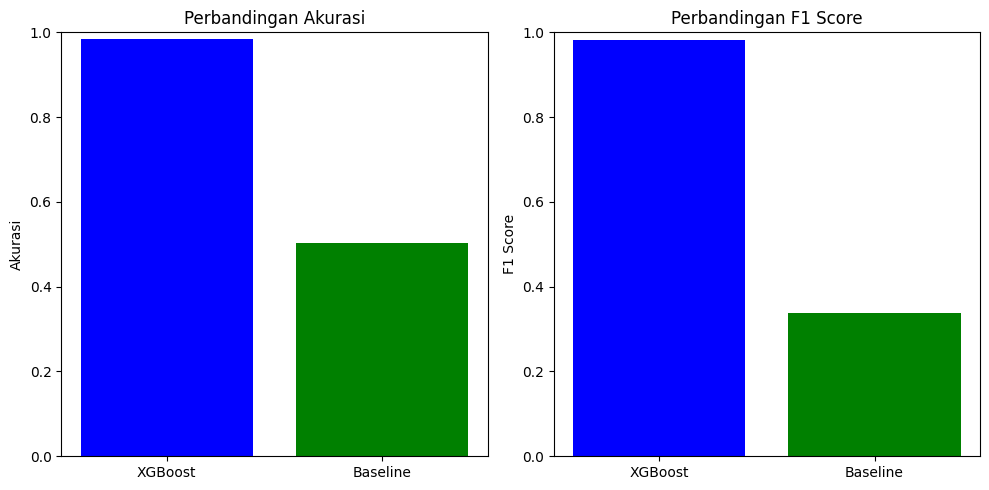

In [73]:
# Contoh data akurasi dan F1 score
models = ['XGBoost', 'Baseline']
accuracies = [XGBoost_accuracy, baseline_accuracy]
f1_scores = [XGBoost_f1_score, baseline_f1_score]

# Plot akurasi
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.bar(models, accuracies, color=['blue', 'green'])
plt.ylim(0, 1)
plt.ylabel('Akurasi')
plt.title('Perbandingan Akurasi')

# Plot F1 score
plt.subplot(1, 2, 2)
plt.bar(models, f1_scores, color=['blue', 'green'])
plt.ylim(0, 1)
plt.ylabel('F1 Score')
plt.title('Perbandingan F1 Score')

plt.tight_layout()
plt.show()

### Saving Models

In [74]:
import pickle

# Menyimpan model ke dalam file
filename = 'model_Xgboost.sav'
pickle.dump(XGBoo, open(filename, 'wb'))

# Beberapa saat kemudian...

# Memuat model dari disk
loaded_model = pickle.load(open(filename, 'rb'))

# Melakukan prediksi pada data uji
y_pred_k = loaded_model.predict(X_test_k)

# Mengukur akurasi model
accuracy = loaded_model.score(X_test_k, y_test_k)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Mengukur F1-score
from sklearn.metrics import f1_score
f1 = f1_score(y_test_k, y_pred_k)
print(f'F1-score: {f1:.2f}')


Accuracy: 99.27%
F1-score: 0.96
